Number of rows:  590
Number of features:  14
sample_id <class 'str'> sample_id
S1      1
S588    1
S302    1
S288    1
S497    1
       ..
S282    1
S321    1
S323    1
S363    1
S590    1
Name: count, Length: 590, dtype: int64
patient_cohort <class 'str'> patient_cohort
Cohort1    332
Cohort2    258
Name: count, dtype: int64
sample_origin <class 'str'> sample_origin
BPTB    409
LIV     132
ESP      29
UCL      20
Name: count, dtype: int64
age <class 'numpy.int64'> age
68    21
58    20
66    18
67    18
62    17
      ..
86     1
33     1
34     1
89     1
85     1
Name: count, Length: 63, dtype: int64
sex <class 'str'> sex
F    299
M    291
Name: count, dtype: int64
diagnosis <class 'numpy.int64'> diagnosis
2    208
3    199
1    183
Name: count, dtype: int64
stage <class 'float'> stage
III    76
IIB    68
IV     21
IB     12
IIA    11
II      7
IA      3
I       1
Name: count, dtype: int64
benign_sample_diagnosis <class 'float'> benign_sample_diagnosis
Pancreatitis                  

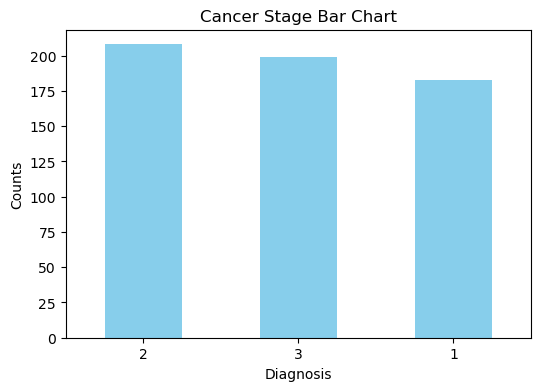

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


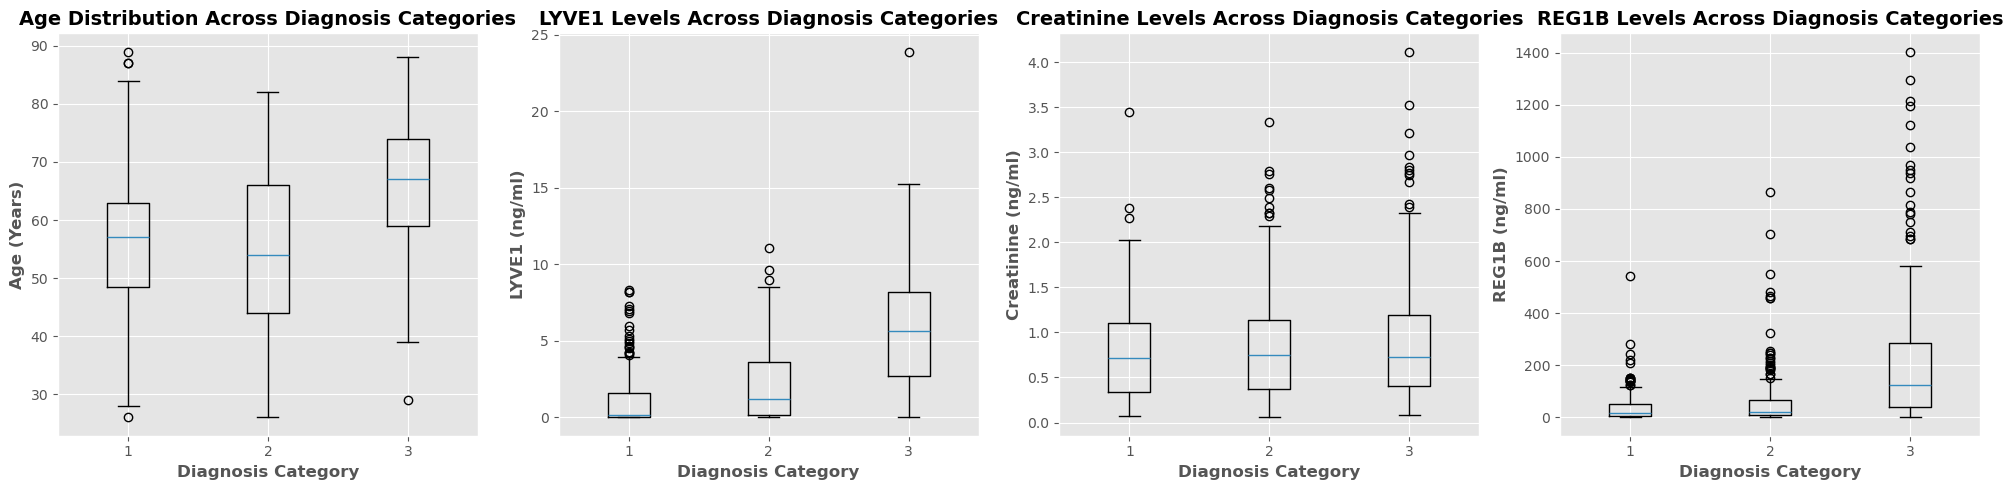

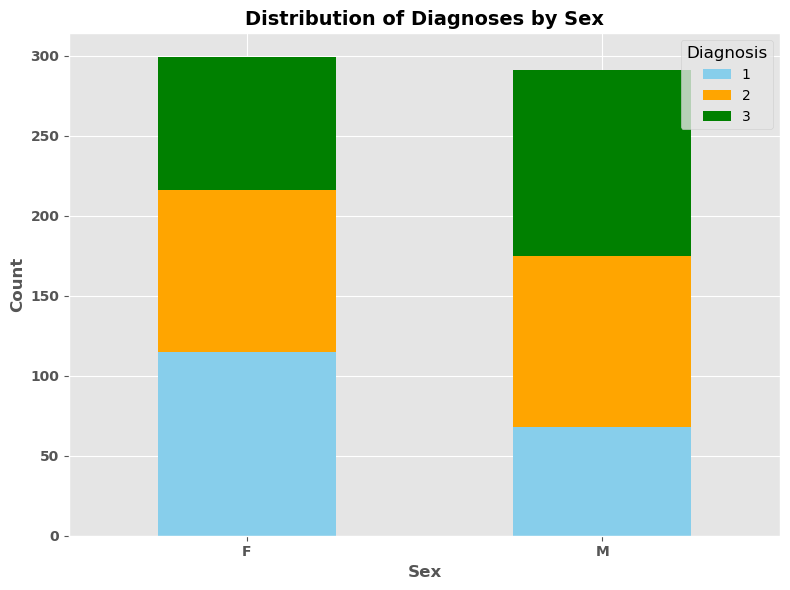

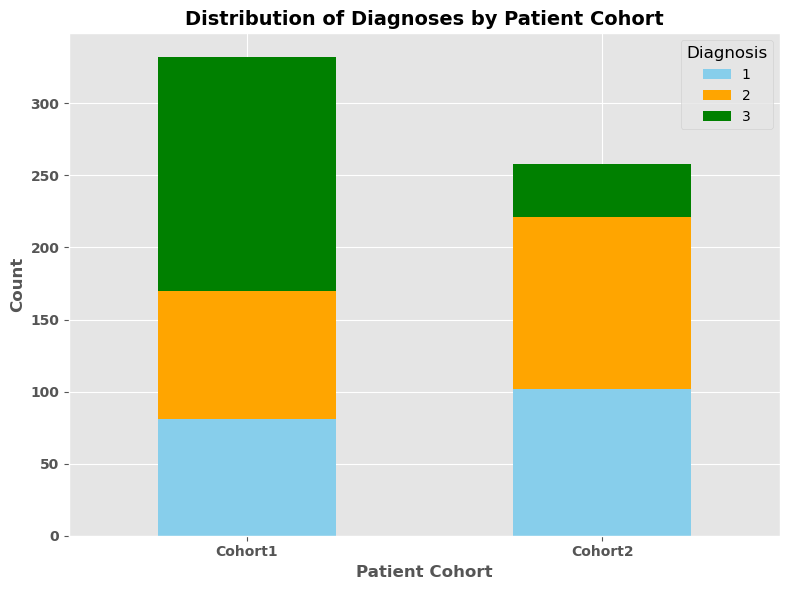

In [1]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pylab as plt

df = pd.read_csv('/Users/matias/Documents/Brown University/Data Science 1030/DATA 1030 FinalProject/Debernardi et al 2020 data.csv')

# EDA

# How many rows and columns do we have in the dataframe?
rows, columns = df.shape
print("Number of rows: ", rows)
print("Number of features: ", columns)

# There are 590 rows, and 14 features

# What are the data types of the columns?
column_names = list(df)
for column in column_names:
    print(column,type(df[column][1]),df[column].value_counts()) 

# Data description based on csv Documentation:
    # Sample ID: unique string identifiying each subject
    # Patient Cohort: Cohort 1 previously used samples
    #                 Cohort 2 previously added samples
    # Sample_origin: BPTB Barts Pancreas Tissue Bank London,UK
    #                ESP: Spanish National Cancer Research Center
    #                LIV: Liverpool University, UK
    #                UCL: University College London, UK
    # Age: Age in years
    # Sex: "M" is Male, "F" is female
    # Diagnosis: (1 = Control, 2 = Benign, 3 = PDAC) [Pancreatic ductal adenocarcinoma]               
    # Stage: Pancratic Cancer: IA, IB, IIA, IIIUB, II, IV
    # Benign Samples Diagnosis: Different diagnoses that are not involved with Benign Samples (with multiple possibilities: eg: Pancreatitis)
    # Plasma CA19-9 U/ml: Blood plasma levels of CA 19-9 monoclonal antibody that is often elevated in patients with pancreatic cancer
    # Creatinine mg/ml: Urinary biomarkers of kidney function
    # LyVE1 ng/ml: Urinary levels of Lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis
    # REG1B ng/ml: Urinary levels of a protein that may be associated with pancreas regeneration
    # TFF ng/ml: Urinary levels of Trefoil Factor 1, which may be related to regeneration and repair of the urinary tract
    # REG1A ng/ml: Urinary levels of a protein that may be associated with pancreas regeneration. Only assessed in 306 patients (one goal of the study was to assess REG1B vs REG1A)


# Is the target variable continuous or catergorical?
print(df['benign_sample_diagnosis'])

# Visualize the target variable

# Get counts of each category in the 'stage' column
stage_counts = df['diagnosis'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6,4))
stage_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Counts')
plt.title('Cancer Stage Bar Chart')
plt.xticks(rotation=0)

# Show the plot
plt.show()

# Develop some (3) figures that might correlate with the target variable

import matplotlib.pyplot as plt

# Check available styles
print(plt.style.available)

# Set presentation style
plt.style.use('ggplot')  

# Set up the figure and subplots
plt.figure(figsize=(20, 5))

# Boxplot for 'Age'
plt.subplot(1, 4, 1)
plt.boxplot([df[df['diagnosis'] == stage]['age'] for stage in df['diagnosis'].unique()])
plt.title('Age Distribution Across Diagnosis Categories', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis Category', fontsize=12, fontweight='bold')
plt.ylabel('Age (Years)', fontsize=12, fontweight='bold')
plt.xticks(ticks=range(1, len(df['diagnosis'].unique())+1), labels=df['diagnosis'].unique(), fontsize=10)

# Boxplot for 'LYVE1'
plt.subplot(1, 4, 2)
plt.boxplot([df[df['diagnosis'] == stage]['LYVE1'] for stage in df['diagnosis'].unique()])
plt.title('LYVE1 Levels Across Diagnosis Categories', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis Category', fontsize=12, fontweight='bold')
plt.ylabel('LYVE1 (ng/ml)', fontsize=12, fontweight='bold')
plt.xticks(ticks=range(1, len(df['diagnosis'].unique())+1), labels=df['diagnosis'].unique(), fontsize=10)

# Boxplot for 'Creatinine'
plt.subplot(1, 4, 3)
plt.boxplot([df[df['diagnosis'] == stage]['creatinine'] for stage in df['diagnosis'].unique()])
plt.title('Creatinine Levels Across Diagnosis Categories', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis Category', fontsize=12, fontweight='bold')
plt.ylabel('Creatinine (ng/ml)', fontsize=12, fontweight='bold')
plt.xticks(ticks=range(1, len(df['diagnosis'].unique())+1), labels=df['diagnosis'].unique(), fontsize=10)

# Boxplot for 'REG1B'
plt.subplot(1, 4, 4)
plt.boxplot([df[df['diagnosis'] == stage]['REG1B'] for stage in df['diagnosis'].unique()])
plt.title('REG1B Levels Across Diagnosis Categories', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis Category', fontsize=12, fontweight='bold')
plt.ylabel('REG1B (ng/ml)', fontsize=12, fontweight='bold')
plt.xticks(ticks=range(1, len(df['diagnosis'].unique())+1), labels=df['diagnosis'].unique(), fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Create a crosstab to count the occurrences of each diagnosis for each sex
sex_diagnosis_counts = pd.crosstab(df['sex'], df['diagnosis'])

# Plot a stacked bar chart
sex_diagnosis_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange', 'green'])

# Add labels and title
plt.title('Distribution of Diagnoses by Sex', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Add a legend
plt.legend(title='Diagnosis', title_fontsize='12', fontsize=10, loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

# Create a crosstab to count the occurrences of each diagnosis for each cohort
cohort_diagnosis_counts = pd.crosstab(df['patient_cohort'], df['diagnosis'])

# Plot a stacked bar chart
cohort_diagnosis_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange', 'green'])

# Add labels and title
plt.title('Distribution of Diagnoses by Patient Cohort', fontsize=14, fontweight='bold')
plt.xlabel('Patient Cohort', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Add a legend
plt.legend(title='Diagnosis', title_fontsize='12', fontsize=10, loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


Training/Validation set class distribution: diagnosis
0    303
1    169
Name: count, dtype: int64
Test set class distribution: diagnosis
0    88
1    30
Name: count, dtype: int64
Fold #1
Transformed training set shape: (377, 8)
Transformed validation set shape: (95, 8)
Fold #2
Transformed training set shape: (377, 8)
Transformed validation set shape: (95, 8)
Fold #3
Transformed training set shape: (378, 8)
Transformed validation set shape: (94, 8)
Fold #4
Transformed training set shape: (378, 8)
Transformed validation set shape: (94, 8)
Fold #5
Transformed training set shape: (378, 8)
Transformed validation set shape: (94, 8)
Transformed test set shape: (118, 8)
Logistic Regression Average Accuracy: 0.7790
Logistic Regression Average F-beta Score: 0.7790
Logistic Regression ROC AUC: 0.8855
Random Forest Average Accuracy: 0.8243
Random Forest Average F-beta Score: 0.8243
Random Forest ROC AUC: 0.9100
SVM Average Accuracy: 0.7890
SVM Average F-beta Score: 0.7890
SVM ROC AUC: 0.8821
KNN A

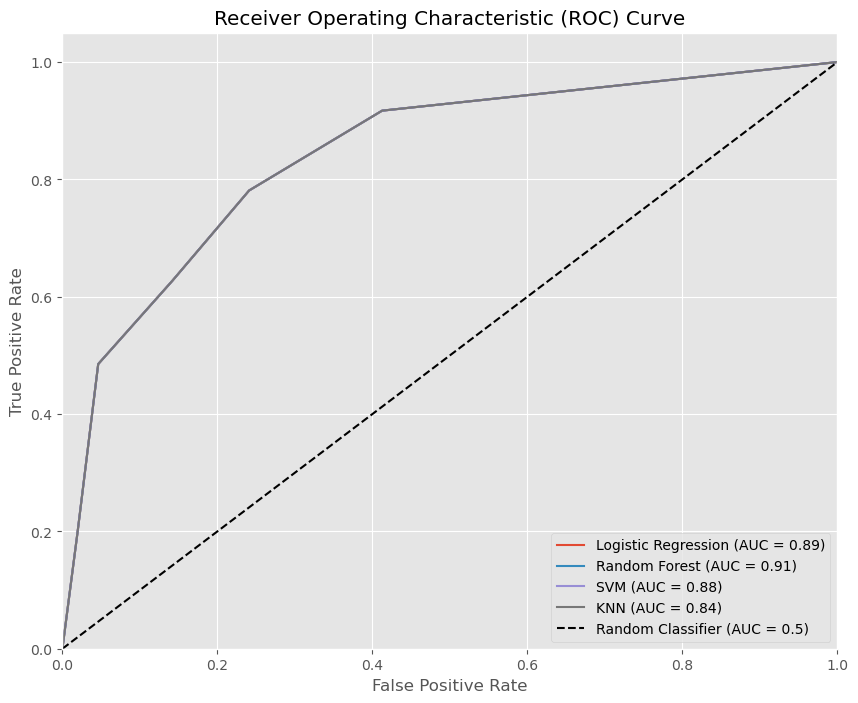

In [28]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Data description based on csv Documentation:
    # Sample ID: unique string identifiying each subject
    # Patient Cohort: Cohort 1 previously used samples
    #                 Cohort 2 previously added samples
    # Sample_origin: BPTB Barts Pancreas Tissue Bank London,UK
    #                ESP: Spanish National Cancer Research Center
    #                LIV: Liverpool University, UK
    #                UCL: University College London, UK
    # Age: Age in years
    # Sex: "M" is Male, "F" is female
    # Diagnosis: (1 = Control, 2 = Benign, 3 = PDAC) [Pancreatic ductal adenocarcinoma]               
    # Stage: Pancratic Cancer: IA, IB, IIA, IIIUB, II, IV
    # Benign Samples Diagnosis: Different diagnoses that are not involved with Benign Samples (with multiple possibilities: eg: Pancreatitis)
    # Plasma CA19-9 U/ml: Blood plasma levels of CA 19-9 monoclonal antibody that is often elevated in patients with pancreatic cancer
    # Creatinine mg/ml: Urinary biomarkers of kidney function
    # LyVE1 ng/ml: Urinary levels of Lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis
    # REG1B ng/ml: Urinary levels of a protein that may be associated with pancreas regeneration
    # TFF ng/ml: Urinary levels of Trefoil Factor 1, which may be related to regeneration and repair of the urinary tract
    # REG1A ng/ml: Urinary levels of a protein that may be associated with pancreas regeneration. Only assessed in 306 patients (one goal of the study was to assess REG1B vs REG1A)
# Drop the target variable and associated diagnosis-related matrix features
X = df.drop(columns=['diagnosis', 'stage', 'benign_sample_diagnosis', 'patient_cohort', 'sample_id', 'sample_origin'], axis=1)
# Modify the target variable to binary classification
y = df['diagnosis'].map({1: 0, 2: 0, 3: 1})

# Step 1: Split into 80% training/validation and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Verification of Training/Validation/Test Distributions
print("Training/Validation set class distribution:", y_train_val.value_counts())
print("Test set class distribution:", y_test.value_counts())

# Step 2: Apply KFold cross-validation on the training/validation set
kf = KFold(n_splits=5, shuffle=True, random_state=30)

# Define the categorical and continuous features
categorical_features = ['sex']
continuous_features = ['plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A', 'age']

# Create a column transformer with IterativeImputer for continuous features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),  # One-hot encoding
        ('num', Pipeline(steps=[
            ('imputer', IterativeImputer(random_state=20)),  # Impute missing values
            ('scaler', StandardScaler())  # Standard scaling
        ]), continuous_features)  # Continuous features with imputation and scaling
    ]
)

fold = 1
for train_index, val_index in kf.split(X_train_val):
    # Split data into folds
    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Preprocess the data
    X_train_transformed = preprocessor.fit_transform(X_train_fold)
    X_val_transformed = preprocessor.transform(X_val_fold)

    print(f"Fold #{fold}")
    print("Transformed training set shape:", X_train_transformed.shape)
    print("Transformed validation set shape:", X_val_transformed.shape)

    fold += 1

# Preprocess the test set (outside the loop)
X_test_transformed = preprocessor.transform(X_test)

# Verify the shape of the test set
print("Transformed test set shape:", X_test_transformed.shape)

# List of models to try
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=30),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# Cross-validation and model evaluation
results = {}
f_beta_scores = {}  # To store F-beta scores for each model
roc_auc_scores = {}  # To store ROC AUC scores

for name, model in models.items():
    fold_scores = []
    fbeta_scores = []
    y_true_all = []
    y_pred_prob_all = []  # Store probabilities for ROC calculation
    
    for train_index, val_index in kf.split(X_train_val):
        # Split data into folds
        X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
        
        # Preprocess the data
        X_train_transformed = preprocessor.fit_transform(X_train_fold)
        X_val_transformed = preprocessor.transform(X_val_fold)
        
        # Train the model
        model.fit(X_train_transformed, y_train_fold)
        
        # Predict and evaluate
        y_pred = model.predict(X_val_transformed)
        y_pred_prob = model.predict_proba(X_val_transformed)
        
        # Store the true labels and predicted probabilities for ROC curve
        y_true_all.extend(y_val_fold)
        y_pred_prob_all.extend(y_pred_prob[:, 1])  # Use probabilities for the positive class
        
        # Calculate F-beta score (for beta=1, it's the F1 score)
        fbeta = fbeta_score(y_val_fold, y_pred, beta=1, average='macro')
        fbeta_scores.append(fbeta)
        
        fold_scores.append(fbeta)
    
    # Calculate and store the average accuracy score and F-beta score across all folds
    average_score = np.mean(fold_scores)
    results[name] = average_score
    f_beta_scores[name] = np.mean(fbeta_scores)
    
    # Calculate ROC curve and AUC
    y_true_bin = label_binarize(y_true_all, classes=[0, 1])  # Binarize labels for binary classification
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), np.array(y_pred_prob_all).ravel())
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[name] = roc_auc

# Print average scores for each model
for model_name, avg_score in results.items():
    print(f"{model_name} Average Accuracy: {avg_score:.4f}")
    print(f"{model_name} Average F-beta Score: {f_beta_scores[model_name]:.4f}")
    print(f"{model_name} ROC AUC: {roc_auc_scores[model_name]:.4f}")
    
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for model_name in models.keys():
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), np.array(y_pred_prob_all).ravel())
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_scores[model_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Columns with missing values and their fractions:
                         Missing Values  Fraction Missing
stage                               391          0.662712
benign_sample_diagnosis             382          0.647458
plasma_CA19_9                       240          0.406780
REG1A                               284          0.481356


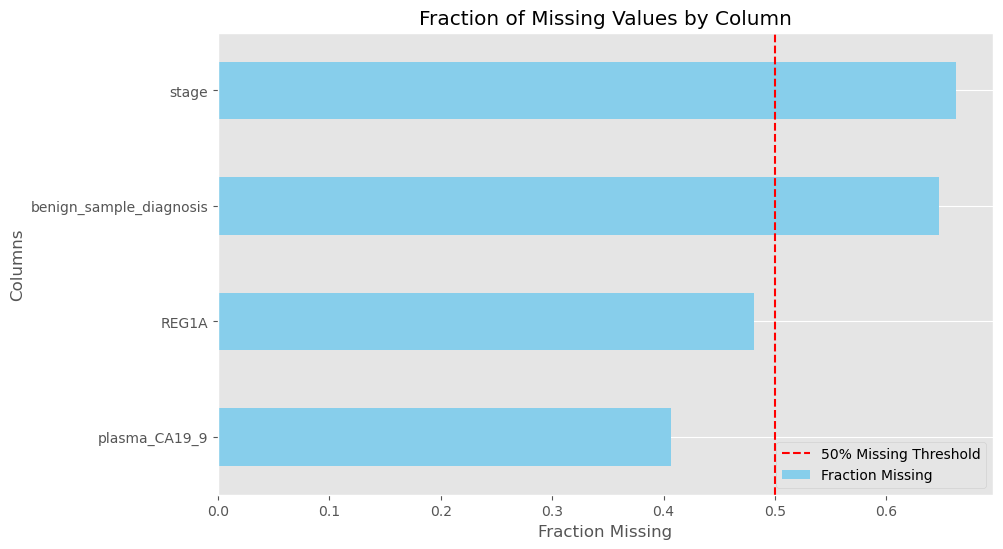

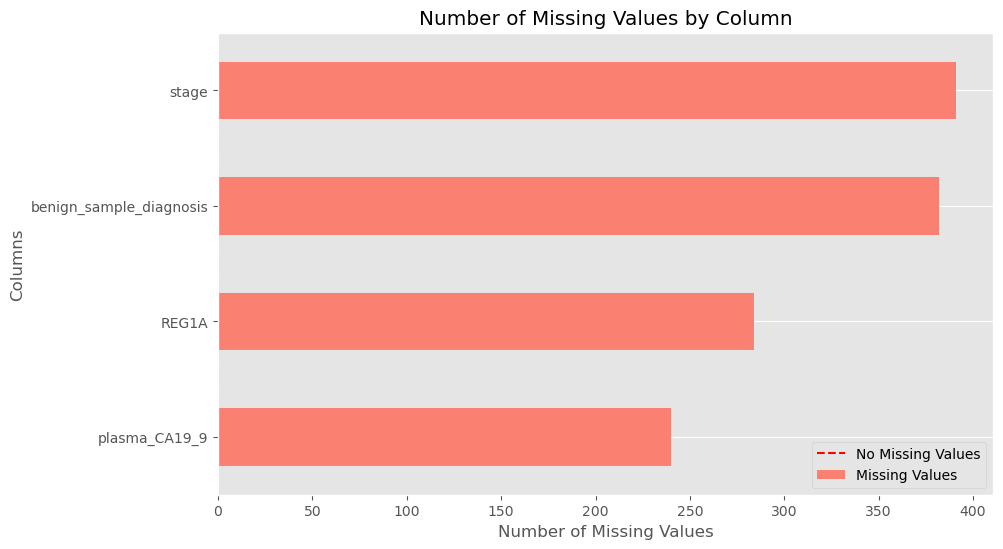

In [4]:
# Check for missing values and calculate the fraction of missing values
missing_values = df.isnull().sum()  # Count of missing values for each column
total_rows = df.shape[0]  # Total number of rows

# Calculate fraction of missing values
missing_fraction = missing_values / total_rows

# Create a DataFrame for easier viewing
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Fraction Missing': missing_fraction
})

# Filter to show only columns with missing values
missing_info = missing_info[missing_info['Missing Values'] > 0]

print("Columns with missing values and their fractions:")
print(missing_info)

import matplotlib.pyplot as plt

# Plotting the fraction of missing values
plt.figure(figsize=(10, 6))
missing_info['Fraction Missing'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Fraction of Missing Values by Column')
plt.xlabel('Fraction Missing')
plt.ylabel('Columns')
plt.axvline(0.5, color='red', linestyle='--', label='50% Missing Threshold')
plt.legend()
plt.grid(axis='x')
plt.show()

# Plotting the number of missing values
plt.figure(figsize=(10, 6))
missing_info['Missing Values'].sort_values().plot(kind='barh', color='salmon')
plt.title('Number of Missing Values by Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.axvline(0, color='red', linestyle='--', label='No Missing Values')
plt.legend()
plt.grid(axis='x')
plt.show()

